# BBH Cloud 8lvl nocool




In [17]:
using Plots, Printf
using Plots.PlotMeasures
using LaTeXStrings

# Set default plot theme
default(
    fontfamily = "Computer Modern",
    framestyle = :box,
    grid = true,
    minorgrid = true,
    linewidth = 2,
    markersize = 6,
    legend_font_pointsize = 9,
    guidefontsize = 11,
    titlefontsize = 12
)

## Strong Scaling

In [18]:
# Data: (nodes, compute time in seconds)
nodes = [1, 2, 4, 8]
times = [1455.46, 838.823, 560.082, 409.765]

4-element Vector{Float64}:
 1455.46
  838.823
  560.082
  409.765

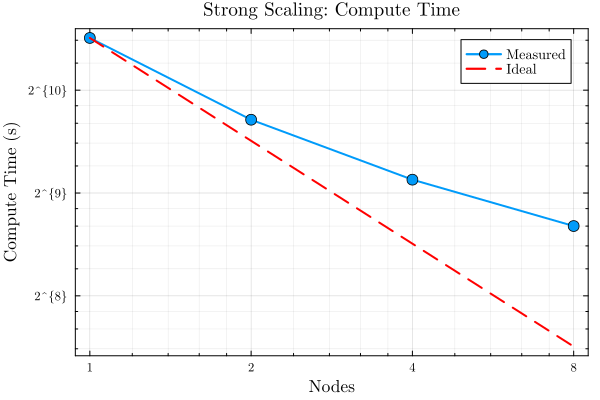

In [19]:
# Calculate ideal scaling (strong scaling baseline from 1 node)
ideal_times = times[1] ./ nodes

# Calculate speedup
speedup = times[1] ./ times
ideal_speedup = nodes

# Plot: Compute Time vs Nodes
plt1 = plot(
    nodes, times,
    label="Measured", marker=:circle,
    xlabel="Nodes", ylabel="Compute Time (s)",
    title="Strong Scaling: Compute Time",
    legend=:topright,
    xscale=:log2, yscale=:log2,
    xticks=(nodes, string.(nodes))
)
plot!(plt1, nodes, ideal_times, label="Ideal", linestyle=:dash, color=:red)


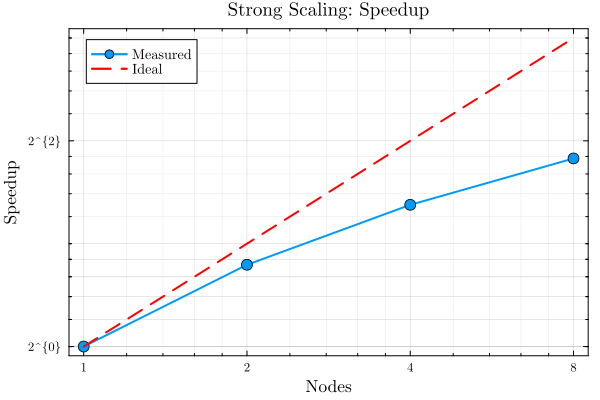

In [20]:
# Plot: Speedup vs Nodes
plt2 = plot(
    nodes, speedup,
    label="Measured", marker=:circle,
    xlabel="Nodes", ylabel="Speedup",
    title="Strong Scaling: Speedup",
    legend=:topleft,
    xscale=:log2, yscale=:log2,
    xticks=(nodes, string.(nodes))
)
plot!(plt2, nodes, ideal_speedup, label="Ideal", linestyle=:dash, color=:red)


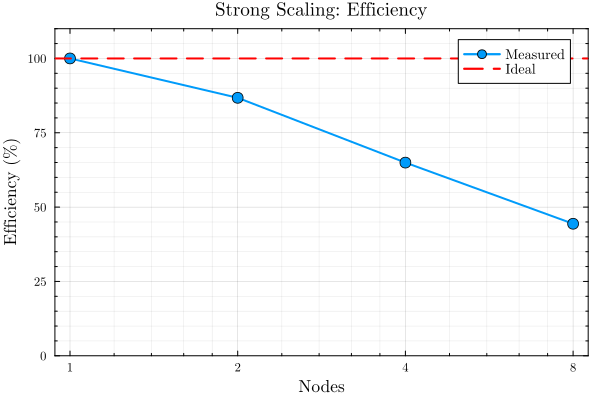

In [21]:
# Calculate parallel efficiency
efficiency = speedup ./ nodes * 100  # in percent

# Plot: Efficiency vs Nodes
plt3 = plot(
    nodes, efficiency,
    label="Measured", marker=:circle,
    xlabel="Nodes", ylabel="Efficiency (%)",
    title="Strong Scaling: Efficiency",
    legend=:topright,
    xscale=:log2,
    xticks=(nodes, string.(nodes)),
    ylims=(0, 110)
)
hline!(plt3, [100], label="Ideal", linestyle=:dash, color=:red)


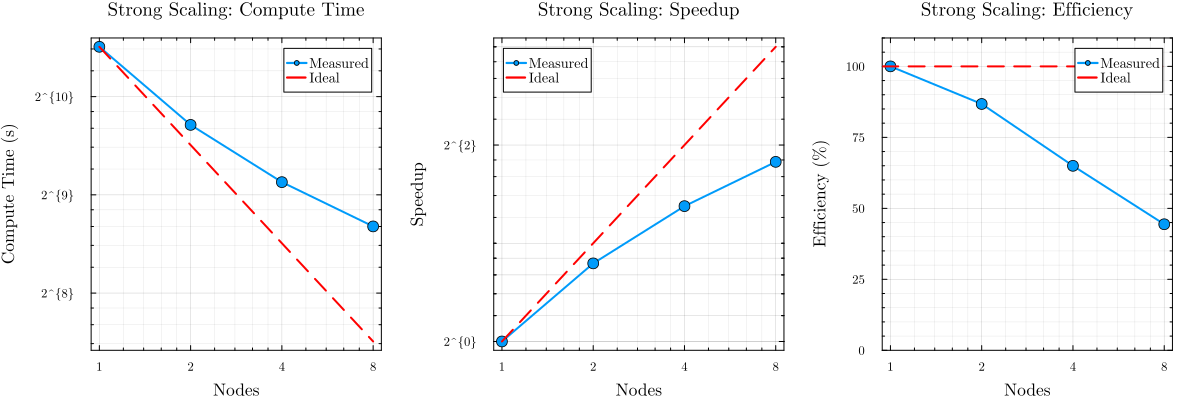

In [22]:
# Combined plot
plot(plt1, plt2, plt3, layout=(1, 3), size=(1200, 400), margin=5mm)


In [23]:
# Print strong scaling statistics
println("Strong Scaling Statistics:")
println("="^50)
@printf("%6s %12s %10s %12s\n", "Nodes", "Time (s)", "Speedup", "Efficiency")
println("-"^50)
for i in eachindex(nodes)
    @printf("%6d %12.2f %10.2fx %11.1f%%\n", nodes[i], times[i], speedup[i], efficiency[i])
end


Strong Scaling Statistics:
 Nodes     Time (s)    Speedup   Efficiency
--------------------------------------------------
     1      1455.46       1.00x       100.0%
     2       838.82       1.74x        86.8%
     4       560.08       2.60x        65.0%
     8       409.76       3.55x        44.4%


## Weak Scaling

In [24]:
# Weak scaling data: (nodes, compute time in seconds)
# Problem size scales with number of nodes
ws_nodes = [1, 8, 27, 64]
ws_times = [1455.46, 1554.6, 1324.01, 1665.31]

4-element Vector{Float64}:
 1455.46
 1554.6
 1324.01
 1665.31

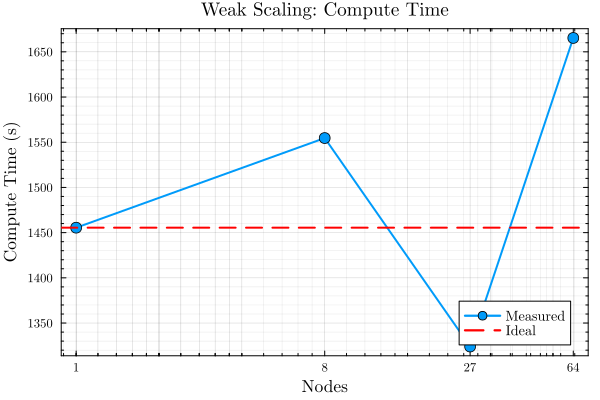

In [25]:
# Weak scaling efficiency: T_1 / T_N (ideal = 100%)
ws_efficiency = ws_times[1] ./ ws_times * 100

# Plot: Compute Time vs Nodes (Weak Scaling)
ws_plt1 = plot(
    ws_nodes, ws_times,
    label="Measured", marker=:circle,
    xlabel="Nodes", ylabel="Compute Time (s)",
    title="Weak Scaling: Compute Time",
    legend=:bottomright,
    xscale=:log2,
    xticks=(ws_nodes, string.(ws_nodes))
)
hline!(ws_plt1, [ws_times[1]], label="Ideal", linestyle=:dash, color=:red)


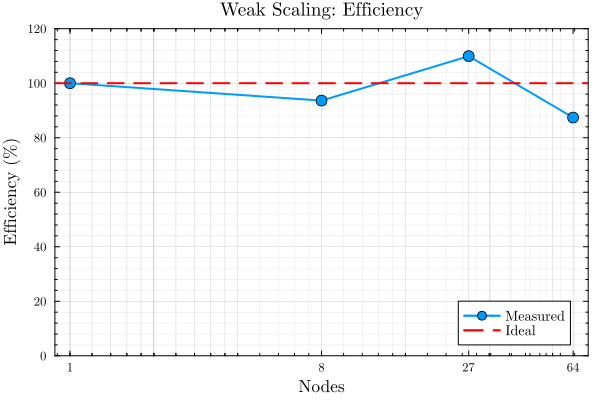

In [26]:
# Plot: Weak Scaling Efficiency
ws_plt2 = plot(
    ws_nodes, ws_efficiency,
    label="Measured", marker=:circle,
    xlabel="Nodes", ylabel="Efficiency (%)",
    title="Weak Scaling: Efficiency",
    legend=:bottomright,
    xscale=:log2,
    xticks=(ws_nodes, string.(ws_nodes)),
    ylims=(0, 120)
)
hline!(ws_plt2, [100], label="Ideal", linestyle=:dash, color=:red)


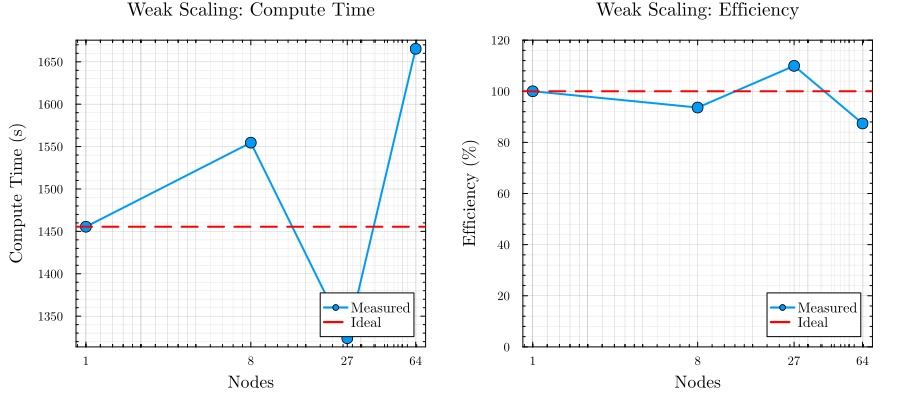

In [27]:
# Combined weak scaling plot
plot(ws_plt1, ws_plt2, layout=(1, 2), size=(900, 400), margin=5mm)


In [28]:
# Print weak scaling statistics
println("Weak Scaling Statistics:")
println("="^50)
@printf("%6s %12s %12s\n", "Nodes", "Time (s)", "Efficiency")
println("-"^50)
for i in eachindex(ws_nodes)
    @printf("%6d %12.2f %11.1f%%\n", ws_nodes[i], ws_times[i], ws_efficiency[i])
end


Weak Scaling Statistics:
 Nodes     Time (s)   Efficiency
--------------------------------------------------
     1      1455.46       100.0%
     8      1554.60        93.6%
    27      1324.01       109.9%
    64      1665.31        87.4%
